In [1]:
import numpy as np
import matplotlib.pyplot as plt
import circularFiltering as flt
import matplotlib
from scipy.stats import norm
import glob
import re
matplotlib.rcParams.update({'font.size': 14,
                            'pdf.fonttype': 42,
                            'ps.fonttype': 42})
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

## Figure S2 - Performance of single-population filter as function of neuron number

In [2]:
preprocess = False # only set to True if you want to re-run preprocessing on data in /data_raw

path_raw = 'data_raw/figureS2/'
path_processed = 'data_processed/'

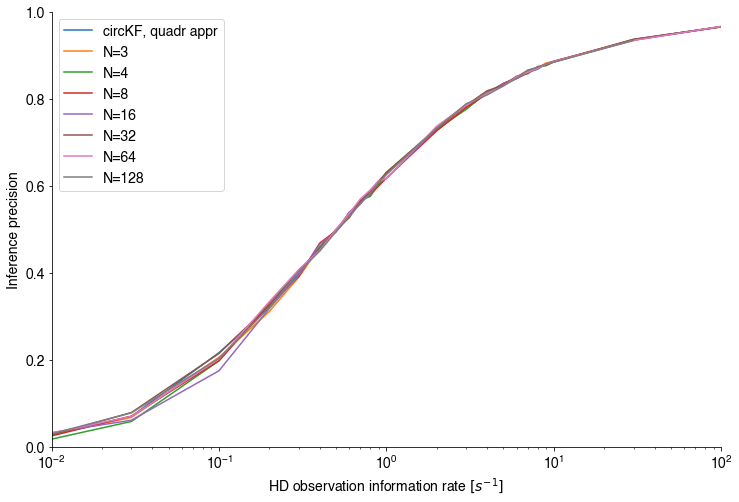

In [3]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
kappa_z_array = np.array([1.e-02, 3.e-02, 1.e-01, 2.e-01, 3.e-01, 4.e-01, 5.e-01, 6.e-01,
       7.e-01, 8.e-01, 9.e-01, 1.e+00, 2.e+00, 3.e+00, 4.e+00, 5.e+00,
       6.e+00, 7.e+00, 8.e+00, 9.e+00, 1.e+01, 3.e+01, 1.e+02])
N_array = np.array([3,4,8,16,32,64,128])

# load reference data
data = np.load(path_processed+'vonMises_q_stats.npz')
stats = data['stats']
ax.plot(kappa_z_array,stats[:,1],label='circKF, quadr appr')

if preprocess:
    MSE_array = np.zeros((len(N_array),len(kappa_z_array)))
    for i in np.arange(len(N_array)):
        N = N_array[i]
        filename = path_raw+"ntwkflt_N="+str(N)
        data = np.load(filename+'.npz')
        stats = data['stats']
        stats[stats==0] = np.nan
        MSE_array[i] = stats[:,1]
    np.savez(path_processed+'figureS2',MSE_array=MSE_array)
else:
    data = np.load(path_processed+'figureS2.npz')
    MSE_array = data['MSE_array']

for i,N in enumerate(N_array):
    ax.plot(kappa_z_array,MSE_array[i],label='N='+str(N))

ax.legend()
ax.set_xscale('log')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylim([0,1])
ax.set_xlim([0.01,100])
ax.set_xlabel(r'HD observation information rate $[s^{-1}]$')
ax.set_ylabel('Inference precision')

plt.show()